In [1]:
#import files and packages
import pandas as pd
import seaborn as sns
ordersDF = pd.read_csv("../data/Orders.csv")
ordersDF.head()


,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [2]:

import numpy as np
import re
import matplotlib.pyplot as plt


In [3]:
#Problem1 Convert Profit and Sales to numeric
ordersDF['Profit'] = ordersDF.Profit.apply(lambda x: x.replace('$',''))
ordersDF['Profit'] = ordersDF.Profit.apply(lambda x: x.replace(' ',''))
ordersDF['Profit'] = ordersDF.Profit.apply(lambda x: x.replace(',',''))
ordersDF['Profit'] = pd.to_numeric(ordersDF['Profit'])

ordersDF['Sales'] = ordersDF.Sales.apply(lambda x: x.replace('$',''))
ordersDF['Sales'] = ordersDF.Sales.apply(lambda x: x.replace(' ',''))
ordersDF['Sales'] = ordersDF.Sales.apply(lambda x: x.replace(',',''))
ordersDF['Sales'] = pd.to_numeric(ordersDF['Sales'])


In [4]:
#Check Averages
print(ordersDF['Sales'].mean())
print(ordersDF['Profit'].mean())

246.49068531878765
28.610970364593253


In [5]:
#Check averages for Order Priority, is there an increase in price for urgency
ordersDF.groupby('Order.Priority').mean()

,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost
Order.Priority,,,,,,,
Critical,26046.747457,54771.961686,250.822930,3.417854,0.136516,31.593141,59.747440
High,25751.321141,55597.518410,245.632546,3.485001,0.143341,27.119091,32.933931
Low,24655.840347,58667.250000,234.251716,3.422855,0.142200,24.197966,27.139061
Medium,25617.670574,54765.879159,247.371836,3.484354,0.143592,29.361721,18.579989


In [6]:

#Create month column to see if there is seasonility by month
ordersDF['month'] = pd.DatetimeIndex(ordersDF['Order.Date']).month
ordersDF.groupby('month').mean()


,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost
month,,,,,,,
1,27372.238606,55556.811370,259.206932,3.397932,0.139840,28.127327,27.278893
2,27200.339973,57110.829582,251.086560,3.363060,0.139237,33.015926,27.106510
3,26303.027935,54538.385757,252.915976,3.455271,0.143783,30.553193,25.515106
4,25041.813325,52350.317147,229.544479,3.451847,0.147805,24.347813,24.760180
5,25947.085028,53780.039422,241.746301,3.484552,0.143602,28.246652,26.938256
6,24878.453037,53376.502140,238.038719,3.396643,0.149176,27.273548,25.742014
7,26149.461659,54103.873418,235.463681,3.457277,0.150546,23.951643,26.274351
8,26576.314511,57220.478138,255.541076,3.474038,0.132269,30.521911,27.044568
9,25522.281638,53799.102026,240.307823,3.437227,0.137205,28.483709,25.110727


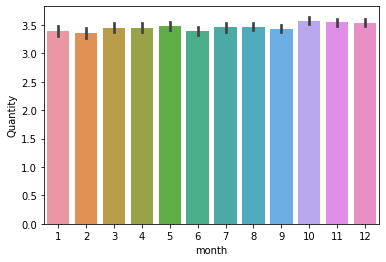

In [7]:
#problem2-1: plot month to see if there is seasonality
sns.barplot(x='month', y='Quantity', data=ordersDF)
ordersDF['monYr'] = pd.to_datetime(ordersDF['Order.Date']).dt.to_period('M')
#sns.barplot.ylim(2.5, 3.5)

In [8]:
#Convert Order Date to date time object check seasonality by day,month,year -- can we see an increase in Order amounts
ordersDF['Order.Date']= pd.to_datetime(ordersDF['Order.Date']) 